In [9]:
%load_ext magic_duckdb

The magic_duckdb extension is already loaded. To reload it, use:
  %reload_ext magic_duckdb


In [10]:
%%dql -t df
INSTALL httpfs;

,Success


In [11]:
%%dql -t df
LOAD  httpfs;

,Success


In [12]:
%%dql
SELECT *
FROM 'https://raw.githubusercontent.com/MarkPhamm/test-kamereo/main/data/data_sql.csv'

,Channel,Category,GMV
0,Horeca,Vegetable,69.3
1,Horeca,Fruit,25.3
2,Horeca,Non-veggie,73.0
3,Horeca,Meat,22.8
4,MT,Vegetable,10.9
5,MT,Fruit,1.1
6,MT,Non-veggie,0.9
7,MT,Meat,0.4
8,KA,Vegetable,14.6
9,KA,Fruit,0.6


# **Question 1**:
Write a SQL query to find the best category in each channel (in GMV). Expected result:

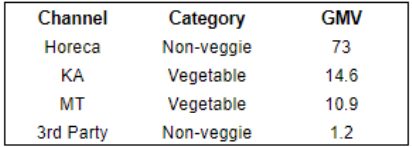

## **1.1: Solution 1: RANK() OVER()**
Using RANK() window function

In [21]:
%%dql
WITH CTE AS (
    SELECT 
        *,
        RANK() OVER (PARTITION BY Channel ORDER BY GMV DESC) AS ranking
    FROM 'https://raw.githubusercontent.com/MarkPhamm/test-kamereo/main/data/data_sql.csv'
)

SELECT 
    Channel, 
    Category,
    GMV
FROM CTE
WHERE ranking = 1
ORDER BY GMV DESC


,Channel,Category,GMV
0,Horeca,Non-veggie,73.0
1,KA,Vegetable,14.6
2,MT,Vegetable,10.9
3,3rd Party,Non-veggie,1.2


## **1.2: Solution 2: MAX() OVER()**
Using MAX() OVER() window function

In [25]:
%%dql
WITH CTE AS (
    SELECT 
        *,
        MAX(GMV) OVER (PARTITION BY Channel) AS max_GMV
    FROM 'https://raw.githubusercontent.com/MarkPhamm/test-kamereo/main/data/data_sql.csv'
)

SELECT 
    Channel, 
    Category,
    GMV
FROM CTE
WHERE GMV = max_GMV
ORDER BY GMV DESC

,Channel,Category,GMV
0,Horeca,Non-veggie,73.0
1,KA,Vegetable,14.6
2,MT,Vegetable,10.9
3,3rd Party,Non-veggie,1.2


## **1.3: Solution 3: MAX() + GROUP BY**

In [32]:
%%dql
WITH CTE AS (
    SELECT 
        Channel,
        MAX(GMV) as max_GMV
    FROM 'https://raw.githubusercontent.com/MarkPhamm/test-kamereo/main/data/data_sql.csv'
    GROUP BY Channel
)

SELECT * FROM 'https://raw.githubusercontent.com/MarkPhamm/test-kamereo/main/data/data_sql.csv'
WHERE GMV in (SELECT max_GMV FROM CTE)

,Channel,Category,GMV
0,Horeca,Non-veggie,73.0
1,MT,Vegetable,10.9
2,KA,Vegetable,14.6
3,3rd Party,Non-veggie,1.2


# **Question 2:**
Write a SQL query to find how many percentages each category is higher or lower between Horeca and MT channel. Expected result:

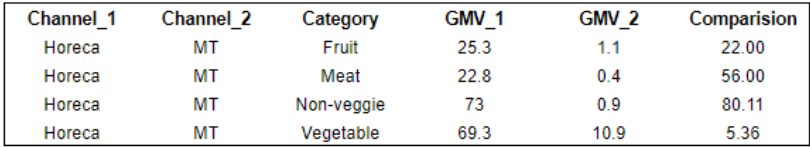

Clarify the comparison columns?

In [49]:
%%dql
WITH Channel_1 AS (
    SELECT 
        *
    FROM 'https://raw.githubusercontent.com/MarkPhamm/test-kamereo/main/data/data_sql.csv'
    WHERE Channel = 'Horeca'
),

Channel_2 AS (
    SELECT 
        *
    FROM 'https://raw.githubusercontent.com/MarkPhamm/test-kamereo/main/data/data_sql.csv'
    WHERE Channel = 'MT'
)


SELECT 
    c1.Channel as Channel_1,
    c2.Channel as Channel_2,
    c1.Category as Category,
    c1.GMV as GMV_1,
    c2.GMV as GMV_2,
    ROUND((c1.GMV-c2.GMV)/c2.GMV,2) as Comparison
FROM Channel_1 c1
JOIN Channel_2 c2
ON c1.Category = c2.Category
ORDER BY Category


,Channel_1,Channel_2,Category,GMV_1,GMV_2,Comparison
0,Horeca,MT,Fruit,25.3,1.1,22.00
1,Horeca,MT,Meat,22.8,0.4,56.00
2,Horeca,MT,Non-veggie,73.0,0.9,80.11
3,Horeca,MT,Vegetable,69.3,10.9,5.36
